
# Project: Investigate TMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a> 
## Introduction

For this project, I chose TMDb movie data to investigate, which was cleaned from original data on Kaggle. According to the overview of the data set options, this dataset contains information around 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions that can be addressed in the dataset:

After getting familiar with this movie dataset, I divided the information into two groups. One group includes metrics that measure the success of these films, such as popularity, revenue, and ratings.
The other is basic information about movies, like release year and so on.

#### Success metrics

* vote_average
* popularity
* revenue


#### Basice information

* id	
* imdb_id	
* budget	
* original_title	
* cast	
* homepage	
* director	
* tagline	
* keywords               
* overview             
* runtime               
* genres                  
* production_companies    
* release_date                          
* release_year   
* vote_count
* budget_adj              
        




First, we could  investigate the basic facts of success metrics. Besides, since there are time factors (release year and release date), which means we can find out the trends of success metrics. I personally would like to focus on the changes in different generations. After that, we could explore the relationships between these variables. Hence, these are my questions to be addressed:

   
## Research A: Basic Facts
    
* Question 1. Which year has the most movies released?
       
* Question 2. Which rating is the most common one?
      
* Question 3. On average, which year's movies have the highest popularity?
       
* Question 4. On average, which year's movies have the highest revenue?
       
## Research B: Explore Trends
    
* Question 1. Which generation has the most movies released?
       
* Question 2. Which generation‘s movies receive the highest average rating?
       
* Question 3. Which generation‘s movies receive the highest popularity?
       
* Question 4. Which generation‘s movies make the highest revenue？
       
## Research C: Relationships Between Variables
    
* Question 1. Are high revenue movies also receive high popularity?
       
* Question 2. Are high rating movies also perform better in revenue?
       
* Question 3. Do popular movies also have better average ratings?






<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### First, let's import the necessary packages for analysis. 

In [1]:
# Import statements for all packages that I plan to use.
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#### Now,let's load our data.

In [2]:
# Load dataset
df = pd.read_csv('tmdb-movies.csv')

#### Then, let's take a look at basic information of dataset.

In [3]:
# Check data 
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### Let's check for cleanliness.

In [4]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Check summary of descriptive statistics 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the information table, there are totally 10866 entries and 21 columns. Also, there are columns have null values. Form the summary, we know that there are plenty of zero values in budget, revenue, budget_adj and revenue_adj columns.
Therefore, let's check how many of null value and zero value.

### Check null value

In [6]:
# Check the sum of null value in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There exists some null value in the cast, director, overview and genres columns. Moreover, some columns are with a lot of null value rows like homepage, tagline, keywords and production_companies, especially the homepage and tagline columns are missing so much data. I believe these columns are not qualified to answer any questions, so I decided to drop both columns. 

### Check zero value

Considering the inflation, I choose budget adj and revenue adj column instead of budget and revenue in the following course of analysis.

In [7]:
# Filter the zero values in budget_adj column
budget_zero = df.query('budget_adj == 0')

# Using groupby to count zero values in budget column 
budget_zero_count =  df.groupby('budget_adj').count()['id']
budget_zero_count.head(2)

budget_adj
0.000000    5696
0.921091       1
Name: id, dtype: int64

It contains 5696 rows of zero values in the budget_adj column.

So does the revenue_adj column

In [8]:
# Filter the zero values in revenue_adj column
revenue_zero = df.query('revenue_adj == 0')

# Using groupby to count zero values in revenue_adj column 
revenue_zero_count =  df.groupby('revenue_adj').count()['id']
revenue_zero_count.head(2)

revenue_adj
0.000000    6016
2.370705       1
Name: id, dtype: int64

It also contains 6015 rows of zero values in the revenue_adj column.

As zero values in both budget_adj and revenue_adj columns accounted for more than 50% of total data, so I decide to keep these rows and replace zero values with null values.

### Check duplicates

In [9]:
# Find the sum of duplicate rows
sum(df.duplicated())

1

After checking the cleanliness of dataset, I decided to drop most columns which contain null values as these columns lacking too much useful information in the analysis process. Except for the columns(revenue_adj, budget_adj) that need to be analyzed to answer my questions. I will replace zero values with null values for both columns. Furthermore, I need to drop duplicate data. Finally, in order to keep dataset easier to read, I need to drop columns that are unnecessary for my analysis, which is imdb_id, budget, revenue, runtime, release_date, vote_count.

### Cleaning Decision Summary


1.Drop columns with missing value: homepage, tagline, keywords, overview, genres, cast, director

2.Drop unnecessary columns for answering those questions : imdb_id, budget, revenue, ,runtime, release_date, vote_count

3.Drop duplicates.

4.Replcae zero values with null values in  revenue_adj and budget_adj columns.


### Data Cleaning 

#### First, according to the previous decision, let's drop columns with missing value: homepage, tagline, keywords, overview, genres, cast, director

In [10]:
# Drop cloumns that have null values 
df.drop(['homepage','tagline','keywords','overview','genres','cast','director'],axis=1,inplace=True)

#### Second, let's drop unncessary columns: imdb_id, budget, revenue, runtime,production_companies, release_date

In [11]:
# Drop unnecessary cloumns
df.drop(['imdb_id','budget','revenue','runtime','production_companies','release_date','vote_count'],axis=1,inplace=True)

In [12]:
# Check the result
df.head(2)

,id,popularity,original_title,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,7.1,2015,1.379999e+08,3.481613e+08


We can see that all unnecessary column have been successfully dropped.

In [13]:
# Let's check infomation of our new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 594.3+ KB


All columns contain 10866 rows. 
#### Now let's find out which row is the duplicate row.

In [14]:
# Figure out the duplicate row number 
df[df.duplicated()]

,id,popularity,original_title,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,TEKKEN,5.0,2010,30000000.0,967000.0


Row 2090 is duplicated row.Let's check the nearby rows.

In [15]:
# Check nerbay rows
df.loc[2088:2091]

,id,popularity,original_title,vote_average,release_year,budget_adj,revenue_adj
2088,43931,0.597254,My Soul to Take,5.2,2010,25000000.0,19829957.0
2089,42194,0.596430,TEKKEN,5.0,2010,30000000.0,967000.0
2090,42194,0.596430,TEKKEN,5.0,2010,30000000.0,967000.0
2091,60309,0.591206,The Conspirator,5.9,2010,25000000.0,15478800.0


We can see that row 2090 is a duplicate of row 2089. Every detail is the same, now we can drop it safely.

In [16]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [17]:
# Check the result
df.loc[2089:2091]

,id,popularity,original_title,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.596430,TEKKEN,5.0,2010,30000000.0,967000.0
2091,60309,0.591206,The Conspirator,5.9,2010,25000000.0,15478800.0


We can see that row 2090 have been successfully dropped. Now let's check our dataset.

In [18]:
# Check infomation of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
id                10865 non-null int64
popularity        10865 non-null float64
original_title    10865 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 999.1+ KB


#### Then, replace zero values with null values in revenue_adj and budget_adj columns.

In [19]:
# Replace zero values with null values in budget_adj column.
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)

So does budget_adj column.

In [20]:
# Replace zero values with null values in revenue_adj column.
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)
# See if nulls are added in budget_adj and revenue_adj columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
id                10865 non-null int64
popularity        10865 non-null float64
original_title    10865 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        5169 non-null float64
revenue_adj       4849 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 999.1+ KB


#### Finally,let's take a look at dataset summary

In [21]:
# Check data summary
df.describe()

,id,popularity,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,66066.374413,0.646446,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,92134.091971,1.000231,0.935138,12.813260,4.196096e+07,1.988557e+08
min,5.000000,0.000065,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,20662.000000,0.383831,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,75612.000000,0.713857,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,417859.000000,32.985763,9.200000,2015.000000,4.250000e+08,2.827124e+09


The statistical summary in budget_adj and revenue_adj column are more acceptable for analysis than before.

### Cleaning Result Summary

The trim and clean process have been done. We have dropped unnecessary columns and duplicates row. Besides, zero values have been replaced with null values in revenue_adj and budget_adj column.

<a id='eda'></a>
## Exploratory Data Analysis


### <a href="#1">Research A: Basic Facts </a>
<ul>
    <li><a href="#1-1">Question 1. Which year has the most movies released?</a></li>
    <li><a href="#1-2">Question 2. Which rating is the most common one?</a></li>
    <li><a href="#1-3">Question 3. On average, which year's movies have the highest popularity?</a></li>
    <li><a href="#1-4">Question 4. On average, which year's movies have the highest revenue?</a></li>
</ul> 

### <a href="#2">Research B: Explore Trends </a>
       
<ul>
    <li><a href="#2-1">Question 1. Which generation has the most movies released?</a></li>
    <li><a href="#2-2">Question 2. Which generation‘s movies receive the highest average rating?</a></li>
    <li><a href="#2-3">Question 3. Which generation‘s movies receive the highest popularity?</a></li>
    <li><a href="#2-4">Question 4. Which generation‘s movies make the highest revenue？</a></li>
</ul> 
   
### <a href="#3">Research C: Relationships Between Variables</a>

<ul>
    <li><a href="#3-1">Question 1. Are high revenue movies also receive high popularity?</a></li>
    <li><a href="#3-2">Question 2. Are high rating movies also perform better in revenue?</a></li>
    <li><a href="#3-3">Question 3. Do popular movies also have better average ratings?</a></li>
</ul> 

<a id='1'></a>
# Research A: Basic Facts

### Prepare Function : Build a value counts function and its plot function
The usage of value_counts and value_counts_plot are as follows, the input argument df_column is the target column that supposed to be count and plot.

In [22]:
# Count the number of movies in each year
def value_counts (df_column):
    print df_column.value_counts().head()
    
# Plot the data of the value_counts function according to the descending way
def value_counts_plot(df_column):
    df_column.value_counts().plot(kind='bar',figsize=(15,5),alpha=0.8)

<a id='1-1'></a>
## Question 1. Which year has the most movies released?

#### Now let's see what the total number of movies released each year is.

In [23]:
# Use value_counts function
value_counts(df['release_year'])

2014    700
2013    659
2015    629
2012    588
2011    540
Name: release_year, dtype: int64


The year 2014 is the year that has the largest number of release movies in our dataset.

#### Then, we can plot it into bar chart.

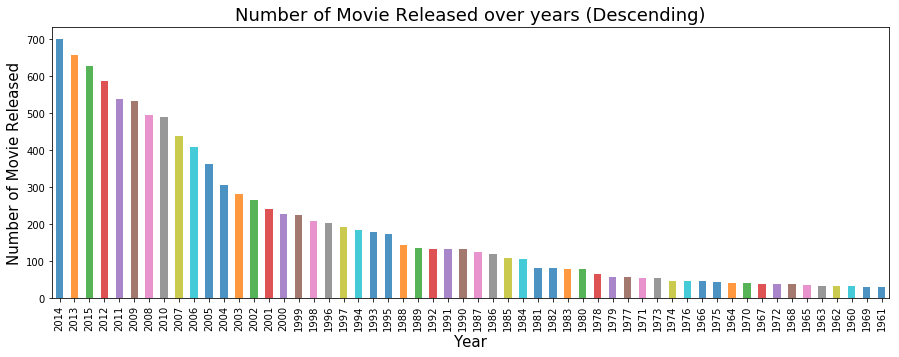

In [24]:
# Use value_counts_plot function
value_counts_plot(df['release_year'])

# Set title and labels
plt.title('Number of Movie Released over years (Descending)',fontsize=18)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Movie Released',fontsize=15);

The year 2014 has the largest number of movies released.

#### Since there is a big gap between the highest and lowest numbers, I will explore trends based on the film's annual release.

In [25]:
# Count the number according release year
release = df.groupby('release_year').count()['id']
release.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

#### Plot a line chart to observe

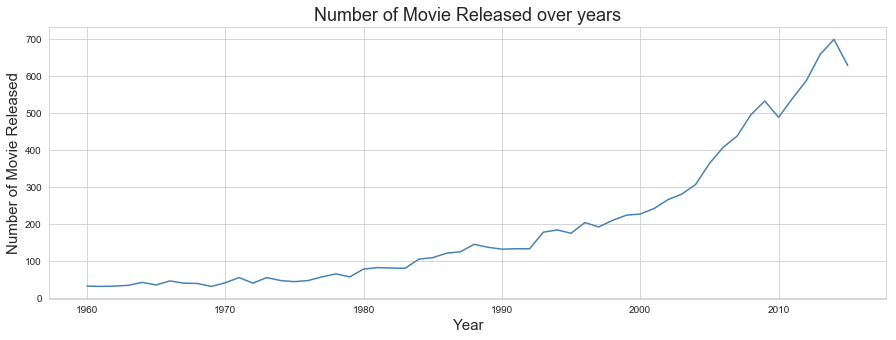

In [26]:
# Set style
sns.set_style('whitegrid')
# Set x, y axis
# x is movie release year
x = release.index
# y is the number of released movies
y = release
# Set size
plt.figure(figsize=(15, 5))
# Plot line chart 
plt.plot(x, y, color = 'steelblue')
# Set title and labels
plt.title('Number of Movie Released over years',fontsize=18)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Movie Released',fontsize=15);

We can see that the number of movies released has been increasing and the growth rate has increased at a rapid speed.

<a id='1-2'></a>
## Question 2. Which rating is the most common one?

#### Use the value_counts and value_counts_plot functions that were built before.

In [27]:
# use value_counts function
value_counts(df['vote_average'])

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
Name: vote_average, dtype: int64


Now we know 6.1 average rating is the most common one. 
#### Let's plot  a bar chart.

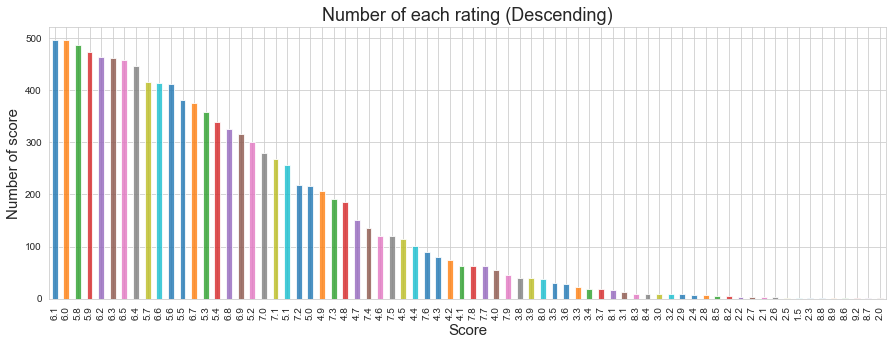

In [28]:
# Use value_count_plot function
value_counts_plot(df['vote_average'])
# Set title and x,y label
plt.title('Number of each rating (Descending)',fontsize= 18)
plt.xlabel('Score',fontsize= 15)
plt.ylabel('Number of score',fontsize= 15);

#### Also, I would like to explore the rating distribution in order of rating.

In [29]:
# Count the number according release year
vote = df.groupby('vote_average').count()['id']
vote.head()

vote_average
1.5    2
2.0    1
2.1    3
2.2    3
2.3    2
Name: id, dtype: int64

#### Plot a line chart to observe

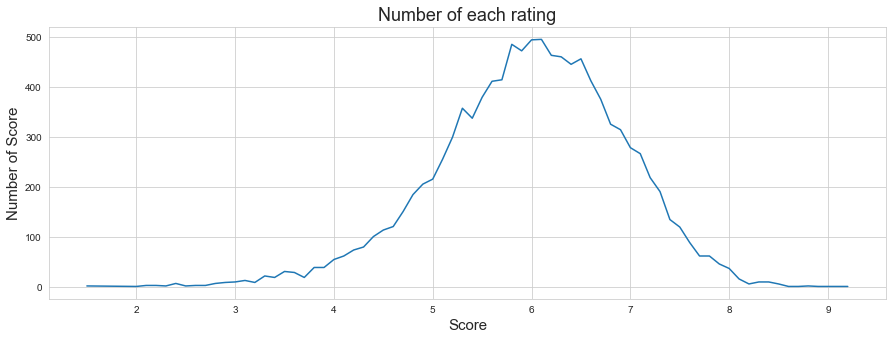

In [30]:
# Set style
sns.set_style('whitegrid')
# Set x, y axis
# x is score
x = vote.index
# y is the total number in each rating
y = vote
# Set size
plt.figure(figsize=(15, 5))
# Plot line chart 
plt.plot(x, y)
# Set title and labels
plt.title('Number of each rating',fontsize= 18)
plt.xlabel('Score',fontsize= 15)
plt.ylabel('Number of Score',fontsize= 15);

We can see that most movies score between 5-7. The number of high and low score movies is very low.

<a id='1-3'></a>
## Question 3. On average, which year's movies have the highest popularity?

#### Now, let's check popularity summary information.

In [31]:
df['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

Since popularity is continuous data, it is difficult to count a certain amount. We should calculate it as the median of each year instead of calculating the total number of each popularity, we can reduce the impact of the released movies total number in different years.

#### Use groupby  to filter release year and popularity, and then we create a new DataFrame for it.

In [32]:
# Use groupby to filter release year and median popularity
year_p = df.groupby('release_year').median()['popularity'] 
# Create a new DataFrame to store year_p
df_year_p = pd.DataFrame(year_p)

#### Then, find out which year has the highest popularity.

In [33]:
# Sort in descending order by using sort_values
df_year_p['popularity'].sort_values(ascending=False).head()

release_year
1995    0.502955
1997    0.465463
2002    0.458767
2004    0.455263
1996    0.454557
Name: popularity, dtype: float64

The year 1995 has the highest popularity.

#### Now we have the information to answer this question, we can visualize it into a bar chart.

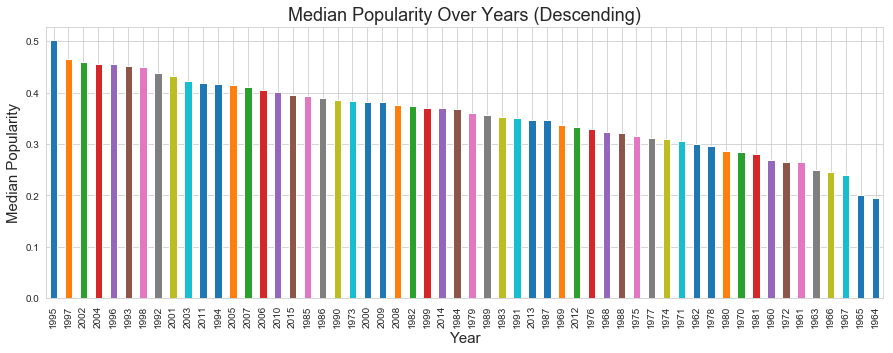

In [34]:
# Plot bar chart
df_year_p['popularity'].sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
# set title and x,y label
plt.title('Median Popularity Over Years (Descending)',fontsize= 18)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('Median Popularity',fontsize= 15);

#### Then, explore data in a line chart in year order.

In [35]:
# Set the index for the following plot.
index_p = df_year_p.index

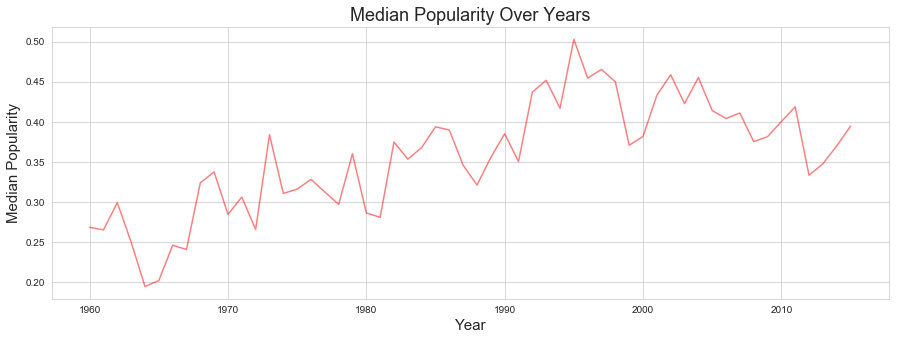

In [36]:
# Set style
sns.set_style('whitegrid')
# Set x, y axis
x, y = index_p, df_year_p
# Set size
plt.figure(figsize=(15, 5))
# Plot the line chart 
plt.plot(x, y, color = 'r',alpha= 0.5)
# Set title and labels
plt.title('Median Popularity Over Years',fontsize= 18)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('Median Popularity',fontsize= 15);

From 1960 to 1995, the median popularity of each year was gradually ascending in strong fluctuations and peaked at over 0.5 in 1995. After that, the number also gradually fell in fluctuations.

<a id='1-4'></a>
## Question 4. On average, which year's movies have the highest revenue?

#### The data in the revenue_adj column is also continuous data, so we should handle it as same as the previous method.

#### After using groupby operation to filter release year and revenue_adj, we create a new DataFrame for it.

In [37]:
# Using groupby operation to filter release year and revenue_adj
year_r = df.groupby('release_year').median()['revenue_adj'] 
# Create a new DataFrame
df_year_r = pd.DataFrame(year_r)

#### Then, find out which year has the highest revenue.

In [38]:
# use sort_value to descending sort data
df_year_r['revenue_adj'].sort_values(ascending=False).head()

release_year
1965    7.731786e+08
1967    2.844954e+08
1969    2.662142e+08
1970    1.659541e+08
1973    1.574344e+08
Name: revenue_adj, dtype: float64

 Now we know that 1965 is the year with the highest number of median revenue.

#### Visualize it into a bar chart.

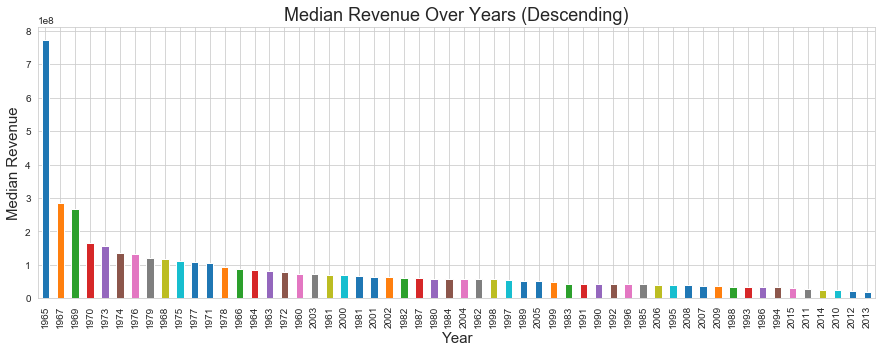

In [39]:
df_year_r['revenue_adj'].sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
# set title and x,y label
plt.title('Median Revenue Over Years (Descending)',fontsize= 18)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('Median Revenue',fontsize= 15);

It shows that 1965 is the most profitable year and 2013 is the worst in revenue performance, which makes me wonder why this happened as we had discovered before that the total number of released movies did show hugely increasing in these years. In common sense, an industry becomes prosperity like the film industry always with vast profit. 

#### Now I will plot a bar chart to visualize the difference between the best and worst year in terms of revenue.

In [40]:
# Select the max value and the release year data
df_year_r_max = df_year_r.loc[[1965]]
# Select the mix value and the release year data
df_year_r_mix = df_year_r.loc[[2013]]

In [41]:
# Use pd.concat to glue together Dataframes that just be created in last cell
df_year_r_maxmin = pd.concat([df_year_r_max,df_year_r_mix])
# Convert to array by using np.ndarray()
year_r_maxmin = np.array(df_year_r_maxmin)

In [42]:
# Assign max and min value to m,n
m = year_r_maxmin.max() 
n = year_r_maxmin.min() 

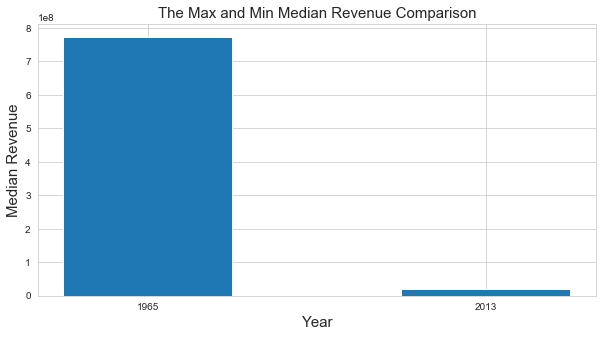

In [43]:
data = [m,n]
labels = ['1965', '2013']
# Set size
plt.figure(figsize=(10, 5))
plt.bar(range(len(data)), data,width=0.5, tick_label=labels)
plt.title('The Max and Min Median Revenue Comparison',fontsize= 15)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('Median Revenue',fontsize= 15)
plt.show();

In [44]:
# Calculate ratio between two numbers 
print m/n

38.105670777396014


The volume of 1965 is 38 times that of 2013.

#### Also, we can explore further with the line chart of median revenue data based on year.

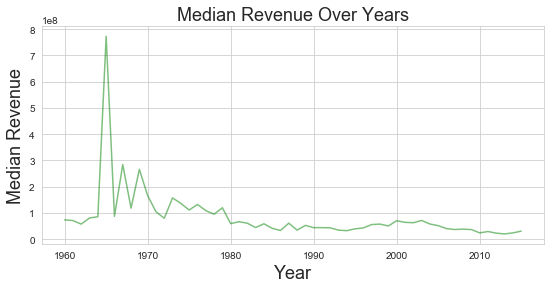

In [45]:
# Set the index for the following plot
index_r = df_year_r.index
# Set style
sns.set_style('whitegrid')
# Set x, y axis
x, y = index_r, df_year_r
# Set size
plt.figure(figsize=(9, 4))
# Plot line chart 
plt.plot(x, y, color = 'g',alpha= 0.5)
# Set title and labels
plt.title('Median Revenue Over Years',fontsize= 18)
plt.xlabel('Year',fontsize= 18)
plt.ylabel('Median Revenue',fontsize= 18);

From 1960 to 1970, the median revenue of each year had strong fluctuations and peaked at 1965, after that, it experienced continue to decline to above 1. After 1980, the line gradually dropped and slightly fluctuated under 1.

## Research A Explore Summary

##### Question 1. Which year has the most movies released?
- We can see that the total number of movies released has increased and the growth rate is rising rapidly over the data duration. The number of movies released in 2014 was the largest, with 700.

###### Question 2. Which rating is the most common one?
- Most movies have an average score of 5-7, and the number of high and low score movies is extremely low. 6.1 is the most common average score, with 496 movies with this rating.

##### Question 3. On average, which year's movies have the highest popularity?
- Movies in 1995 got the highest median popularity. From 1960 to 1995, the annual average popularity increased gradually in the midst of strong fluctuations, reaching a peak of more than 0.5 in 1995. After that, this number gradually declined to around 0.4.

##### Question 4. On average, which year's movies have the highest revenue?
- 1965 was the year with the highest median income. From 1960 to 1970, the median annual income fluctuated strongly and reached its peak in 1965, after which it continued to drop to above 1. After 1980, the line gradually declined, at slightly below 1. The results that the worst year is 2013 and the best year is 1965 is confused me.

<a id='2'></a>
## Research B. Explore Trends

In this part of the study, I want to find out that which generations have most successful in three success metrics separately.

#### * Question 1. Which generation has the most movies released?       
#### * Question 2. Which generation‘s movies receive the highest average rating?
#### * Question 3. Which generation‘s movies receive the highest popularity?       
#### * Question 4. Which generation‘s movies make the highest revenue？
####     




<a id='2-1'></a>
## Question 1. Which generation has the most movies released?

#### Let's create a new decade column and mark each row as the corresponding generation.

In [46]:
# Calculate the year into decade and create a new column called decade 
df['decade']= 10 * (df['release_year'] // 10)
# Check new column
df.tail()

,id,popularity,original_title,vote_average,release_year,budget_adj,revenue_adj,decade
10861,21,0.080598,The Endless Summer,7.4,1966,NaN,NaN,1960
10862,20379,0.065543,Grand Prix,5.7,1966,NaN,NaN,1960
10863,39768,0.065141,Beregis Avtomobilya,6.5,1966,NaN,NaN,1960
10864,21449,0.064317,"What's Up, Tiger Lily?",5.4,1966,NaN,NaN,1960
10865,22293,0.035919,Manos: The Hands of Fate,1.5,1966,127642.279154,NaN,1960


Successfully create a new decade column.

#### Now, let's find out the number of movies released in different generations and plot a bar chart.

2010    3605
2000    3562
1990    1765
1980    1063
1970     508
Name: decade, dtype: int64


Text(0,0.5,'Movie Number')

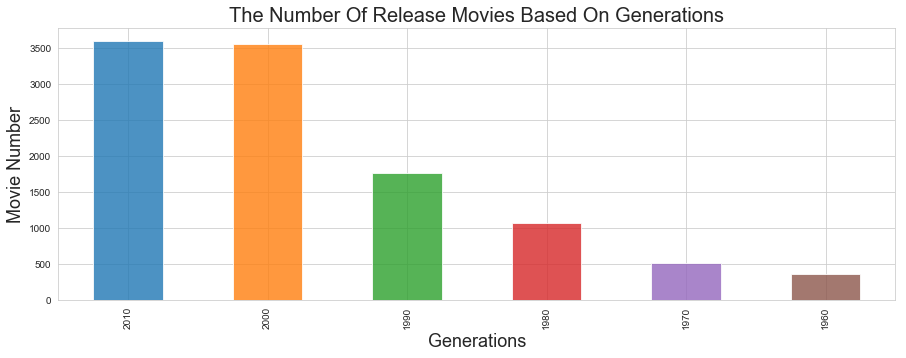

In [47]:
# Use value_counts function to show the total count in descending order
value_counts(df['decade'])
# Use value_counts_plot function to plot
value_counts_plot(df['decade'])
# Set title and labels
plt.title('The Number Of Release Movies Based On Generations',fontsize= 20)
plt.xlabel('Generations',fontsize= 18);
plt.ylabel('Movie Number',fontsize= 18)

In the 2010s,  there were the most released movies, with 3,605 movies. Interestingly, there were 3,562 films in the 2000s, very close to 2010. Overall, we can see that, closer to the modern era, there are more movies released.

<a id='2-2'></a>
## Question 2. Which generation‘s movies receive the highest average rating?

#### Use the pivot table to create a data frame to plot chart easily afterward.

In [48]:
# Create piovt table
a = df.pivot_table('vote_average', index='decade', aggfunc='median')
# Print piovt table in descending order
a['vote_average'].sort_values(ascending =False)

decade
1970    6.4
1960    6.3
1990    6.1
1980    6.1
2000    6.0
2010    5.9
Name: vote_average, dtype: float64

Movies in the 1960s received the highest average ratings.

#### Let's plot data into a line chart.

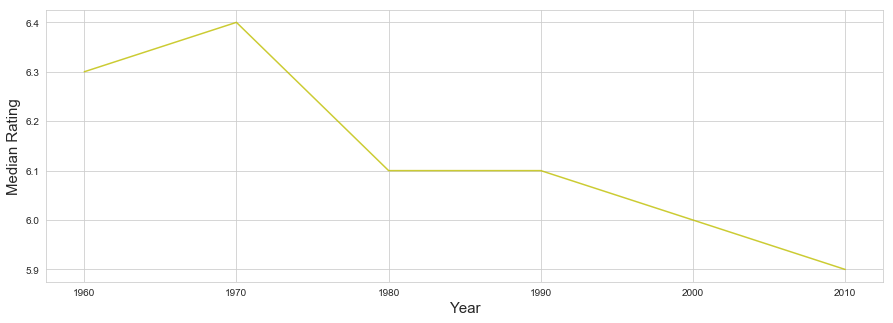

In [49]:
# Set index
a_index = a.index
# Set style
sns.set_style('whitegrid')
# Set x, y axis
x, y = a_index, a
# Set size
plt.figure(figsize=(15, 5))
# Plot the line chart 
plt.plot(x, y, color = 'y',alpha= 0.8)
# Set labels
plt.xlabel('Year',fontsize= 15)
plt.ylabel('Median Rating',fontsize= 15);

It can be seen that the annual median score in the 1960s was 6.3 and reached a peak of 6.4 in the 1970s. After that, the median score continued to drop to the lowest point of 5.9 in the 2010s

<a id='2-3'></a>
## Question 3. Which generation‘s movies receive the highest popularity?

#### Also, we can use the pivot table on popularity and decade columns.

In [50]:
# Create piovt table
a2 = df.pivot_table('popularity', index='decade', aggfunc='median')
# Print piovt table in descending way
a2['popularity'].sort_values(ascending =False)

decade
1990    0.420701
2000    0.405751
2010    0.375458
1980    0.351379
1970    0.317801
1960    0.258688
Name: popularity, dtype: float64

Movies in the 2010s receive higher median popularity than other generation.

#### We can plot data to see the changes in median popularity.

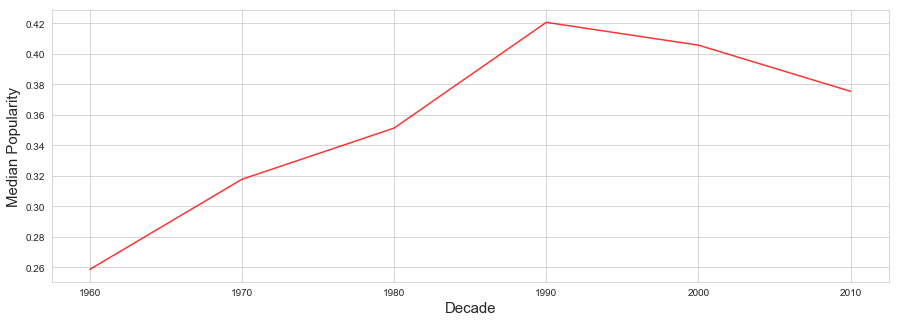

In [51]:
# Set index
a2_index = a2.index
# Set style
sns.set_style('whitegrid')
# Set x, y axis
x, y = a2_index, a2
# Set size
plt.figure(figsize=(15, 5))
# Plot the line chart 
plt.plot(x, y, color = 'r',alpha= 0.8)
# Set labels
plt.xlabel('Decade',fontsize= 15)
plt.ylabel('Median Popularity',fontsize= 15);

From the 1960s, the median popularity has gradually risen and peaked at 0.42 in the 1990s. After the 1980s, it declined to under 0.38 in the 2010s.

<a id='2-4'></a>
## Question 4. Which generation‘s movies make the highest revenue？

#### Similarly, use the pivot table to simplify our process.

In [52]:
# Create piovt table
a3 = df.pivot_table('revenue_adj', index='decade', aggfunc='median')
# Print piovt table in descending way
a3['revenue_adj'].sort_values(ascending=False)

decade
1970    1.218480e+08
1960    1.006300e+08
1980    4.807889e+07
2000    4.619354e+07
1990    4.336269e+07
2010    2.581710e+07
Name: revenue_adj, dtype: float64

The 1970s makes the highest median revenue.

#### Let's Plot a line chart to take a look at the changes in revenue.

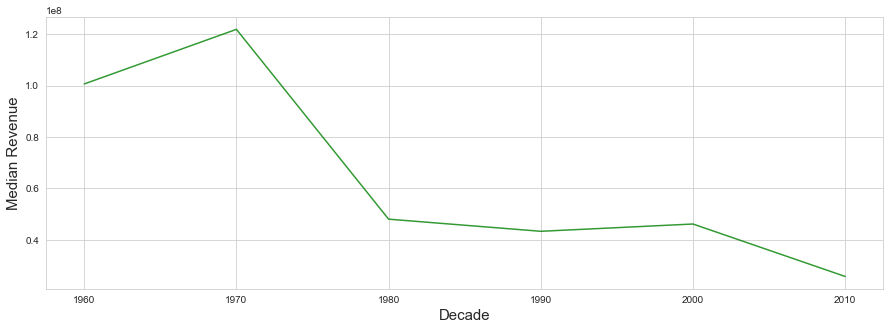

In [53]:
# Set index
a3_index = a3.index
# Set style
sns.set_style('whitegrid')
# Set x, y axis
x, y = a3_index, a3
# Set size
plt.figure(figsize=(15, 5))
# Plot the line chart 
plt.plot(x, y, color = 'g',alpha= 0.8)
# Set labels
plt.xlabel('Decade',fontsize= 15)
plt.ylabel('Median Revenue',fontsize= 15);

We can see that the median box office in the 1970s was the highest at about 1.3. After that, the line declined sharply to around 0.6 in the 1980s and continued fluctuated around the value until dropped to about 0.5 in the 2010s.

## Research B Explore Summary

##### Question 1. Which generation has the most movies released?       
- In the 2010s, there were the most released movies, with 3,605 movies. Interestingly, there were 3,562 films in the 2000s, very close to the 2010s. Overall, we can see that, closer to the modern era, there are more movies released.

##### Question 2. Which generation‘s movies receive the highest average rating?
- Movies in the 1960s received the highest average ratings. It can be seen that the annual median score in the 1960s was 6.3 and reached a peak of 6.4 in the 1970s. After that, the median score continued to drop to the lowest point of 5.9 in the 2010s.

##### Question 3. Which generation‘s movies receive the highest popularity?   
- Movies in the 2010s receive higher median popularity than other generation. From the 1960s, the median popularity has gradually risen and peaked at 0.42 in the 1990s. After the 1980s, it declined to under 0.38 in the 2010s.

##### Question 4. Which generation‘s movies make the highest revenue？
- The 1970s makes the highest median revenue. We can see that the median box office in the 1970s was the highest at about 1.3. After that, the line declined sharply to around 0.6 in the 1980s and continued fluctuated around the value until dropped to about 0.5 in the 2010s.

<a id='3'></a>
## Research C: Relationships Between Success Metrics

#### * Question 1. Are high revenue movies also receive high popularity?

#### * Question 2. Are high rating movies also perform better in revenue?

#### * Question 3. Do popular movies also have better average ratings?


####      

In Research C, we will use the scatter plot to exolore their correlation. In addition, Using Pearson correlation to figure out the relationships between these variables.

<a id='3-1'></a>
## Question 1. Are high revenue movies also receive high popularity?

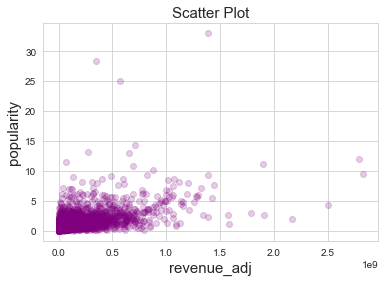

In [54]:
# Set x and y
x = df['revenue_adj']
y = df['popularity']
fig = plt.figure()
ax1 = fig.add_subplot(111)
#  Set title
ax1.set_title('Scatter Plot',fontsize=15)
#  Set x label
plt.xlabel('revenue_adj',fontsize=15)
#  Set y label
plt.ylabel('popularity',fontsize=15)
# Plot scatter plot
plt.scatter(x, y, alpha=0.2,c='purple')  
plt.show()

#### Let's using .corr()  to compute pairwise pearson correlation of columns, excluding NA/null values.

In [55]:
# Compute Pearson correlation coefficient
print(df[['revenue_adj', 'popularity']].corr(method='pearson'))

             revenue_adj  popularity
revenue_adj     1.000000    0.561746
popularity      0.561746    1.000000


>According to the [wikipedia page relating to the Pearson correlation coefficient,](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) several authors have offered guidelines for the interpretation of a correlation coefficient. However, all such criteria are in some ways arbitrary. The interpretation of a correlation coefficient depends on the context and purposes. A correlation of 0.8 may be very low if one is verifying a physical law using high-quality instruments, but may be regarded as very high in the social sciences where there may be a greater contribution from complicating factors. Since I lack relative information about these metrics in the film industry, I would determine the degree of correlation according to a general standard as the table below show.

##### General Standard of the Pearson Correlation Coefficient
 
| Correlation	 | Negative	     |Positive|
|:---------------|------------:  |:------:|
| None	         |−0.09 to 0.0	 |0.0 to 0.09
| Weak	         |−0.3 to −0.1	 |0.1 to 0.3
| Moderate	     |−0.5 to −0.3	 |0.3 to 0.5
| Strong	     |−1.0 to −0.5   |0.5 to 1.0



Here we see a strong positive correlation between revenue_adj and popularity.

<a id='3-2'></a>
## Question 2. Are high rating movies also perform better in revenue?

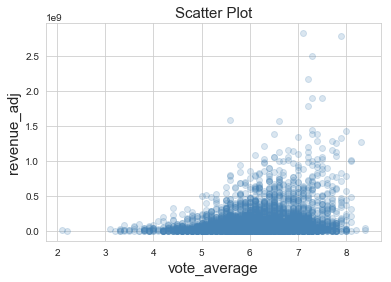

In [56]:
# Set x and y
x = df['vote_average']
y = df['revenue_adj']
fig = plt.figure()
ax1 = fig.add_subplot(111)
# Set title
ax1.set_title('Scatter Plot',fontsize=15)
# Set x axislabel
plt.xlabel('vote_average',fontsize=15)
# Set y label
plt.ylabel('revenue_adj',fontsize=15)
# Plot scatter plot
plt.scatter(x, y, alpha=0.2,c = 'steelblue')  
plt.show()

#### Caculate Pearson correlation.

In [57]:
# Compute Pearson correlation coefficient
print(df[['vote_average', 'revenue_adj']].corr(method='pearson'))

              vote_average  revenue_adj
vote_average      1.000000     0.242319
revenue_adj       0.242319     1.000000


##### General Standard of the Pearson Correlation Coefficient
 
| Correlation	 | Negative	     |Positive|
|:---------------|------------:  |:------:|
| None	         |−0.09 to 0.0	 |0.0 to 0.09
| Weak	         |−0.3 to −0.1	 |0.1 to 0.3
| Moderate	     |−0.5 to −0.3	 |0.3 to 0.5
| Strong	     |−1.0 to −0.5   |0.5 to 1.0



Here we see a weak positive correlation between vote_average and revenue_adj.

<a id='3-3'></a>
## Question 3. Do popular movies also have better average ratings?

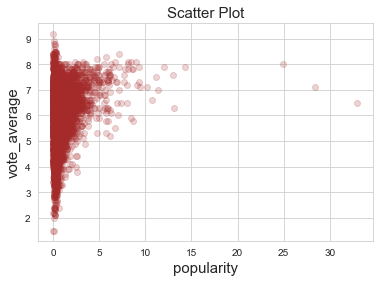

In [58]:
# Set x and y
x = df['popularity']
y = df['vote_average']
fig = plt.figure()
ax1 = fig.add_subplot(111)
# Set title
ax1.set_title('Scatter Plot',fontsize=15)
# Set x label
plt.xlabel('popularity',fontsize=15)
# Set y label
plt.ylabel('vote_average',fontsize=15)
# Plot scatter plot
plt.scatter(x, y, alpha=0.2,c= 'brown')  
plt.show()

There is no significant correlation between revenue_adj and vote_average.

#### Calculate the Pearson correlation coefficient of these variables as in the previous steps.

In [59]:
# Compute Pearson correlation coefficient
print(df[['vote_average', 'popularity']].corr(method='pearson'))

              vote_average  popularity
vote_average      1.000000    0.209517
popularity        0.209517    1.000000


##### General Standard of the Pearson Correlation Coefficient
 
| Correlation	 | Negative	     |Positive|
|:---------------|------------:  |:------:|
| None	         |−0.09 to 0.0	 |0.0 to 0.09
| Weak	         |−0.3 to −0.1	 |0.1 to 0.3
| Moderate	     |−0.5 to −0.3	 |0.3 to 0.5
| Strong	     |−1.0 to −0.5   |0.5 to 1.0



Here we see a weak positive correlation between vote_average and popularity

## Research C Explore Summary

##### Question 1. Are high revenue movies also receive high popularity?
- There is a strong positive correlation between revenue_adj and popularity. (0.561746)

##### Question 2. Are high rating movies also perform better in revenue?
- There is a weak positive correlation between vote_average and revenue_adj. (0.242319)

##### Question 3. Do popular movies also have better average ratings?
- There is weak positive correlation between popularity and vote_average. (0.209517)

<a id='conclusions'></a>
## Conclusions

I divide this research into three parts:

### Part A: Basic Facts

In this part, I explored some basic questions. The result turned out that the total number of movies circulation and the growth rate has increased significantly over the data duration, in which 2014 was the most high-production year. In addition, I found that 6.1 is the most common average score. Most movies have an average score of 5-7, and the number of high and low score movies is extremely low. Besides, Movies in 1995 got the highest median popularity. Moreover, 1965 was the year with the highest median income. 


### Part B: Explore Trends

In this part, I explored the decade trend of success metrics and find out the generation that performs best in these metrics. The result turned out that closer to the modern era, there are more movies released. In the 2010s, there were the most released movies. Interestingly, the number of the 2000s is very close to those of the 2010s. Besides, movies in the 1960s received the highest average ratings. The annual median score in the 1960s was 6.3 and reached a peak of 6.4 in the 1970s. After that, the median score continued to drop to the lowest point of 5.9 in the 2010s. Moreover, movies in the 2010s receive higher median popularity than other generation. From the 1960s, the median popularity has gradually risen and peaked at 0.42 in the 1990s. After the 1980s, it declined to under 0.38 in the 2010s. In addition, the 1970s makes the highest median revenue. After that, the line declined sharply to around 0.6 in the 1980s and continued fluctuated around the value until dropped to about 0.5 in the 2010s.

### Part C: Relationships Between Success Metrisc

In this part, I explored the relationships between success metrics. The result turned out that there is a strong positive correlation between revenue_adj and popularity. Besides, the weak positive correlation both be found in vote_average/revenue_adj and vote_average/popularity.

In conclusion, I find some interesting result during the analysis, but there are still some limitations to my investigation.

### Limitation

1. Success metrics definition: Although I have chosen three generally accepted indicators for measuring film success, I have not clearly defined the boundaries of the measurement criteria, which means high, medium, and low numerical boundaries of popularity, revenue, and ratings.

2. Data quality: In order to preserve the revenue adj data, I replaced a lot of zeros with null values in the revenu adj column, but it seems to cause unreasonable statistical results. 

3. Outliers: I did not think enough about data wrangling process, and there are still many extreme values that haven't been processed yet, which can affect the results. In addition, I chose to analyze the average rating but did not consider the vote_count column that could lead to bias. If there are movies that have small vote counts with high scores, the result would be less accurate.

4. In Research C, I should first define better/high revenue, better/higher average ratings, and high popularity/popular movie standards.

### Reference

### 1. A method to segment years into generations.

[Reference to the method of segmentation into generations](https://cblog.csdn.net/qq_33361618/article/details/82788477)

#### #Used code
df['decade']= 10 * (df['release_year'] // 10)

### 2. I learn a lot in this bolg.

[01. Investigate TMDb Movie Dataset (Python Data Analysis Project) — Part 1 Data Wrangling](https://medium.com/@onpillow/01-investigate-tmdb-movie-dataset-python-data-analysis-project-part-1-data-wrangling-3d2b55ea7714)

### 3. Documentation of Matplotlib

https://matplotlib.org/ 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

### 4. Documentation of Seaborn

https://seaborn.pydata.org/generated/seaborn.set_style.html

### 5. A Resource of teaching Matplotlib

https://morvanzhou.github.io/tutorials/data-manipulation/plt/

### 6. Instructions of using jupyter notebook markdown cell and shortcuts

https://www.cnblogs.com/giserliu/p/4997144.html

### 7. Data Cleaning （Handling missing data）

https://www.cnblogs.com/xiaohuahua108/p/6237906.html

### 8. Learn functions 

https://www.learnpython.org/en/Functions
    
https://stackoverflow.com/questions/40759649/dataframe-object-is-not-callable-the-function

### 9. Plotting pivot tables

https://stackoverflow.com/questions/42406186/plotting-pivot-tables-in-python

### 10. The Pearson correlation coefficient

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

https://www.statisticssolutions.com/pearsons-correlation-coefficient/